# 【課題1】練習のために特徴量の選択
#### データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import pandas as pd
df_origial = pd.read_csv("house_price_dataset_train.csv")
df = df_origial.loc[:,['GrLivArea','YearBuilt','SalePrice']]
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# 【課題2】回帰問題のパイプライン

#### データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れ（パイプライン）を作成・実行してください。
#### sklearn.linear_model.LinearRegression — scikit-learn 0.20.2 documentation
#### 評価のための指標値は分類問題と異なり、平均二乗誤差（Mean Squared Error, MSE）を使うことが一般的です。
#### sklearn.metrics.mean_squared_error — scikit-learn 0.20.2 documentation
#### 可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

In [2]:
#データフレームの分割
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.25,random_state=0)

#学習用
X_train = df_train.iloc[:,0:2].values
y_train = df_train.iloc[:,2].values
#検証用
X_test = df_test.iloc[:,0:2].values
y_test = df_test.iloc[:,2].values

In [3]:
#学習用データ標準化
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
scl.fit(X_train)
X_train_std = scl.transform(X_train)
#検証用データ標準化
X_test_std = scl.transform(X_test)

C:\Users\kohei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kohei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kohei\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
#線形回帰で学習・推測
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train,y_train)
y_pred_ols = ols.predict(X_test)

#平均二乗誤差（MSE）を算出
from sklearn.metrics import mean_squared_error
print('MSE:', mean_squared_error(y_test, y_pred_ols))

MSE: 2725908099.0636377


In [5]:
#データフレームへの格納
df_pred = pd.DataFrame()
df_pred['y_pred'] = y_pred_ols
df_pred['y_test'] = y_test
df_X_train = pd.DataFrame(X_test, columns=['GrLivArea','YearBuilt'])
df_pred = pd.concat([df_pred,df_X_train],axis=1)
df_pred.head()

,y_pred,y_test,GrLivArea,YearBuilt
0,264130.408612,200624,2515,1957
1,155093.637163,133000,1578,1941
2,127493.478709,110000,1203,1950
3,236349.809404,192000,2022,1977
4,138415.022475,88000,1092,1971


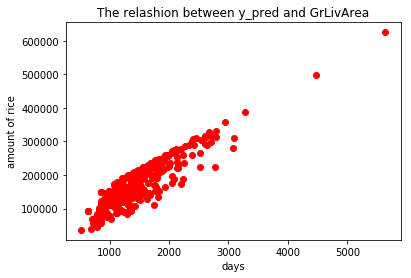

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

#可視化
plt.title("The relashion between y_pred and GrLivArea")
plt.xlabel("days")
plt.ylabel("amount of rice")
plt.scatter(df_pred['GrLivArea'],df_pred['y_pred'], color='red')

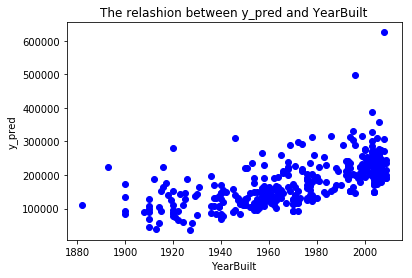

In [7]:
plt.title("The relashion between y_pred and YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("y_pred")
plt.scatter(df_pred['YearBuilt'],df_pred['y_pred'], color='blue')

# 【課題3】手法の比較
#### 以下の全ての手法について学習・推定・評価・可視化を行ってください。
#### そして、指標値を１つの表にまとめてください。
#### その表と可視化した図を利用して結果を簡単に考察してください。
#### どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

#### 線形回帰
#### SVM
#### 決定木
#### ランダムフォレスト

In [8]:
#モデルの作成
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

ols = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)

In [9]:
#学習
ols.fit(X_train_std,y_train)
svr.fit(X_train_std,y_train)
tree.fit(X_train_std,y_train)
rf.fit(X_train_std,y_train)

C:\Users\kohei\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import r2_score

#各モデルと名前をリストに格納
SCORES = [mean_squared_error,r2_score]
SCORE_NAMES = ['MSE','r2_score']
MODELS =[ols,svr,tree,rf]
MODEL_NAMES =['ols','svr','tree','rf']


#各モデルの各精度指標のデータフレームを作成
scores_datas = pd.DataFrame(index=SCORE_NAMES, columns=MODEL_NAMES)


#各モデルの各スコアをデータフレームに記入してゆく
for model,model_names in zip(MODELS,MODEL_NAMES):
    for score,score_names in zip(SCORES,SCORE_NAMES):
        scores_datas.at[score_names,model_names] = score(y_test,model.predict(X_test_std))
scores_datas

,ols,svr,tree,rf
MSE,2.72591e+09,6.94335e+09,2.91155e+09,2.05711e+09
r2_score,0.587104,-0.0517168,0.558984,0.688408


In [11]:
#可視化
df_pred = pd.DataFrame()
df_pred['y_test'] = y_test

for model,model_names in zip(MODELS,MODEL_NAMES):
    y_pred = model.predict(X_test_std)
    df_pred['y_pred:' + model_names] = y_pred

    
df_X_train = pd.DataFrame(X_test, columns=['GrLivArea','YearBuilt'])
df_pred = pd.concat([df_pred,df_X_train],axis=1)
df_pred .head()

,y_test,y_pred:ols,y_pred:svr,y_pred:tree,y_pred:rf,GrLivArea,YearBuilt
0,200624,264130.408612,162596.644328,191000.0,206390.0,2515,1957
1,133000,155093.637163,162391.810737,174500.0,138910.0,1578,1941
2,110000,127493.478709,162297.351093,125000.0,129250.0,1203,1950
3,192000,236349.809404,162695.866190,144000.0,177300.0,2022,1977
4,88000,138415.022475,162361.514111,81500.0,88775.0,1092,1971


## 線形回帰

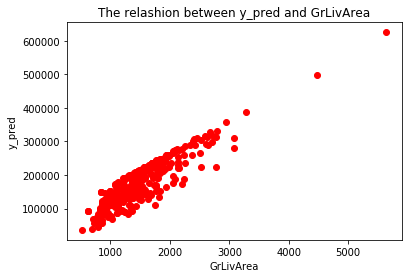

In [12]:
plt.title("The relashion between y_pred and GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("y_pred")
plt.scatter(df_pred['GrLivArea'],df_pred['y_pred:ols'], color='red')

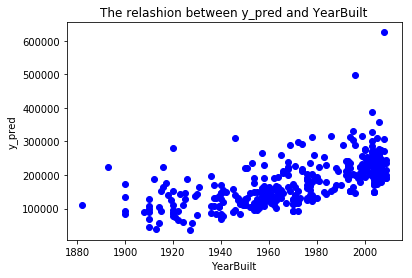

In [13]:
plt.title("The relashion between y_pred and YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("y_pred")
plt.scatter(df_pred['YearBuilt'],df_pred['y_pred:ols'], color='blue')

## SVM

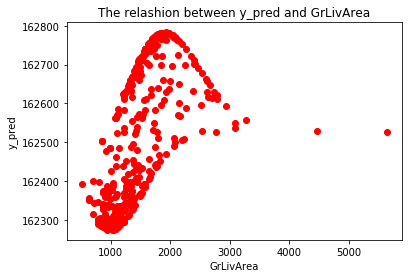

In [14]:
plt.title("The relashion between y_pred and GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("y_pred")
plt.scatter(df_pred['GrLivArea'],df_pred['y_pred:svr'], color='red')

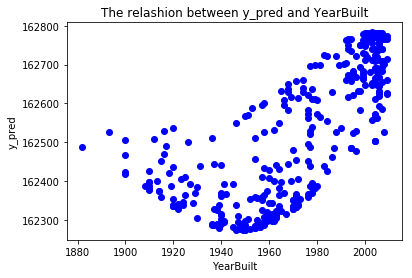

In [15]:
plt.title("The relashion between y_pred and YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("y_pred")
plt.scatter(df_pred['YearBuilt'],df_pred['y_pred:svr'], color='blue')

## 決定木

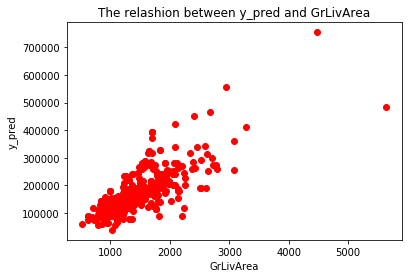

In [16]:
plt.title("The relashion between y_pred and GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("y_pred")
plt.scatter(df_pred['GrLivArea'],df_pred['y_pred:tree'], color='red')

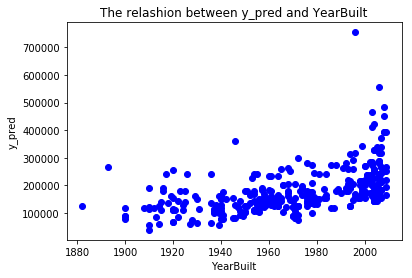

In [17]:
plt.title("The relashion between y_pred and YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("y_pred")
plt.scatter(df_pred['YearBuilt'],df_pred['y_pred:tree'], color='blue')

## ランダムフォレスト

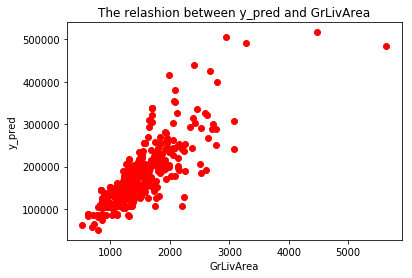

In [18]:
plt.title("The relashion between y_pred and GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("y_pred")
plt.scatter(df_pred['GrLivArea'],df_pred['y_pred:rf'], color='red')

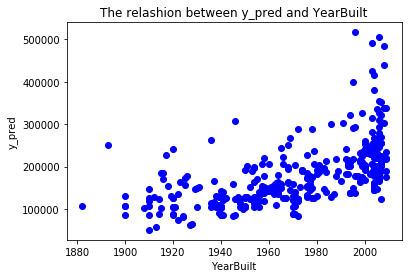

In [19]:
plt.title("The relashion between y_pred and YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("y_pred")
plt.scatter(df_pred['YearBuilt'],df_pred['y_pred:rf'], color='blue')

指標のスコアが良かったのはランダムフォレストであり、次いで線形回帰。
どちらもGrLiveAreaと予測価格を線形の関係として捉える傾向が強くなっているが、
ランダムフォレストの方がGrLivAreaとYearBuiltを使った複雑な関係式で予測を行っており、
対して線形回帰の方は予測を行う上でGrLivAreaの重みが大きく出ている。

# 【問題4】（アドバンス課題）各パラメータの意味
#### 手法のパラメータはデフォルトとしましたが、
#### 実際に利用する上ではデフォルトは必ずしも良い設定ではありません。
#### それぞれの意味を調査した上で複数の設定を試し、その結果を報告してください。

# 【問題5】（アドバンス課題）他の特徴量も使用しての学習
#### ここまでは練習のために2つの特徴量だけを使いましたが、
#### 他の特徴量を加えるとどのようになるか検証してください。
#### どう選択・加工するかにはデータ分析が重要になってきます。

#### Kaggleのカーネルも参考にできます。